## Holiday Package Prediction

### Overview

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

The data consist of 20 columns and 4888 rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
df =pd.read_csv("Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data Cleaning

1. Handling Missing Values 

2. Handling Duplicates

3. Check data type

4. Understand the dataset

In [5]:
### Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [11]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [12]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [13]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [14]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [15]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
## Checking Missing Values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [18]:
## These are the featues with nan values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [19]:
## Statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median value for Age column

2. Impute Mode for TypeofContact

3. Impute Median for DurationofPitch

4. Impute Mode for NumberOfFollowups

5. Impute Mode for PreferredPropertyStar

6. Impute Median for NumberOfTrips

7. Impute Mode for NumberOfChildrenVisiting

8. Impute Median for MonthlyIncome

In [20]:
#Age
df.Age.fillna(df.Age.median(),inplace = True)

In [21]:
# TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace = True)

In [22]:
# DurationofPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace = True)

In [23]:
# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace = True)

In [24]:
# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace = True)

In [25]:
# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace = True)

In [26]:
# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace = True)

In [27]:
# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace = True)

In [28]:
df.drop('CustomerID',inplace = True,axis = 1)

In [29]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [30]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Feature Engineering

In [31]:
### Create New Feature
df['Total_Visiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis = 1,inplace = True)

In [32]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [33]:
# GET NUM OF COLOMS AND ROWS
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :18
Number of rows :4888


In [34]:
## get all the numerical features
num_features = [feature for feature in df.columns if df[feature].dtype!='O']
print('Number of Numerical Features ::',len(num_features))

Number of Numerical Features :: 12


In [35]:
## Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features ::',len(cat_features))

Number of Categorical Features :: 6


In [36]:
## Discreate Features
discreate_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Number of Discreate Features ::',len(discreate_features))

Number of Discreate Features :: 9


In [37]:
## Continuous Features
continuous_features = [feature for feature in num_features if feature not in discreate_features]
print('Number of Continuous Features ::',len(continuous_features))

Number of Continuous Features :: 3


In [38]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
              'duplicated':df.duplicated().sum(),
              'datatype':df.dtypes
             })

,count,nulls,nulls%,cardinality,duplicated,datatype
ProdTaken,4888,0,0.0,2,141,int64
Age,4888,0,0.0,44,141,float64
TypeofContact,4888,0,0.0,2,141,object
CityTier,4888,0,0.0,3,141,int64
DurationOfPitch,4888,0,0.0,34,141,float64
Occupation,4888,0,0.0,4,141,object
Gender,4888,0,0.0,2,141,object
NumberOfFollowups,4888,0,0.0,6,141,float64
ProductPitched,4888,0,0.0,5,141,object
PreferredPropertyStar,4888,0,0.0,3,141,float64


In [39]:
### Checking Unique Value in Each Column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: ProdTaken
Unique Values: [1 0]
Number of Unique Values: 2

Column: Age
Unique Values: [41. 49. 37. 33. 36. 32. 59. 30. 38. 35. 31. 34. 28. 29. 22. 53. 21. 42.
 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. 47. 18. 60. 61.]
Number of Unique Values: 44

Column: TypeofContact
Unique Values: ['Self Enquiry' 'Company Invited']
Number of Unique Values: 2

Column: CityTier
Unique Values: [3 1 2]
Number of Unique Values: 3

Column: DurationOfPitch
Unique Values: [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  24.  35.  28.  20.  26.  34.  23.
   5.  19. 126.   7.  36. 127.]
Number of Unique Values: 34

Column: Occupation
Unique Values: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Number of Unique Values: 4

Column: Gender
Unique Values: ['Female' 'Male']
Number of Unique Values: 2

Column: NumberOfFollowups
Unique Values: [3. 4. 2. 5. 1. 6.]
Number of Unique Values: 6


In [40]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


### Train Test Split and Model Training

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis = 1)
y = df['ProdTaken']

In [42]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [43]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [44]:
## Separate the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 4128 to 860
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3666 non-null   float64
 1   TypeofContact           3666 non-null   object 
 2   CityTier                3666 non-null   int64  
 3   DurationOfPitch         3666 non-null   float64
 4   Occupation              3666 non-null   object 
 5   Gender                  3666 non-null   object 
 6   NumberOfFollowups       3666 non-null   float64
 7   ProductPitched          3666 non-null   object 
 8   PreferredPropertyStar   3666 non-null   float64
 9   MaritalStatus           3666 non-null   object 
 10  NumberOfTrips           3666 non-null   float64
 11  Passport                3666 non-null   int64  
 12  PitchSatisfactionScore  3666 non-null   int64  
 13  OwnCar                  3666 non-null   int64  
 14  Designation             3666 non-null   obj

In [46]:
## Create Column Transformer with 3 types of transformer
cat_feature = X.select_dtypes(include = "object").columns
num_feature =X.select_dtypes(exclude = "object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [47]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_Visiting'],
      dtype='object'))])

In [48]:
# Apply the Transformation on Training Dataset (fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [49]:
X_train

array([[ 1.        ,  1.        ,  0.        , ..., -1.27370232,
        -0.41594151, -0.05880979],
       [ 0.        ,  0.        ,  1.        , ...,  0.7851128 ,
        -0.22414633, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.71121511, -0.76800938],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.3560529 ,  0.65038981],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.24859453,  0.65038981],
       [ 0.        ,  0.        ,  1.        , ..., -1.27370232,
        -1.07585337, -1.47720898]])

In [50]:
# # Apply the Transformation on Test Dataset (transform)
X_test = preprocessor.transform(X_test)

In [51]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.73187289, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.664972  , -0.05880979],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.41613103, -0.76800938],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.22414633, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.53515017,  1.35958941],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -1.1984734 , -0.76800938]])

### Multiple Classifier Model Training

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,\
                            recall_score,f1_score,roc_auc_score

models = {
          "Random Forest Classifier":RandomForestClassifier(),
          "Decision Tree Classifier":DecisionTreeClassifier(),
          "Logistic Regression":LogisticRegression(),
          "AdaBoost Classifier":AdaBoostClassifier(),
          "GradientBoosting Classifier":GradientBoostingClassifier(),
          "XGBoost Classifier":XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average = 'weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    ## Test Set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average = 'weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    print("*******************************************")
    
    print("Model Performance for Training Set ::")
    print("-Accuracy :{:.4f}".format(model_train_accuracy))
    print("-F1 Score :{:.4f}".format(model_train_f1))
    print("-Precision :{:.4f}".format(model_train_precision))
    print("-Recall :{:.4f}".format(model_train_recall))
    print("-ROC AUC Score :{:.4f}".format(model_train_rocauc_score))
    print("Confusion Matrix::\n",confusion_matrix(y_train,y_train_pred))
    print("Classification Report:: \n",classification_report(y_train,y_train_pred))

    print("---------------------------------------------------------------------")
    
    print("Model Performance for Test Set ::")
    print("-Accuracy :{:.4f}".format(model_test_accuracy))
    print("-F1 Score :{:.4f}".format(model_test_f1))
    print("-Precision :{:.4f}".format(model_test_precision))
    print("-Recall :{:.4f}".format(model_test_recall))
    print("-ROC AUC Score :{:.4f}".format(model_test_rocauc_score))
    print("Confusion Matrix::\n",confusion_matrix(y_test,y_test_pred))
    print("Classification Report:: \n",classification_report(y_test,y_test_pred))
    
    print("="*75)
                

Random Forest Classifier
*******************************************
Model Performance for Training Set ::
-Accuracy :1.0000
-F1 Score :1.0000
-Precision :1.0000
-Recall :1.0000
-ROC AUC Score :1.0000
Confusion Matrix::
 [[2969    0]
 [   0  697]]
Classification Report:: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666

---------------------------------------------------------------------
Model Performance for Test Set ::
-Accuracy :0.9272
-F1 Score :0.9213
-Precision :0.9467
-Recall :0.6368
-ROC AUC Score :0.8144
Confusion Matrix::
 [[991   8]
 [ 81 142]]
Classification Report:: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       999
           1       0.95

### Hyperparameter Tuning with RandomizedSearchCV

In [65]:
## Hyperparameter Training
rf_params = {
    "max_depth":[5,8,15,10],
    "max_features":[5,7,"auto",10],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,300,500]
}
adaboost_params ={
    "n_estimators":[50,60,70,80,90,100],
    "algorithm":["SAMME",'SAMME.R']
    
}
gradient_params = {
    "loss":["log_loss","deviance","exponential"],
    "criterion":["friedman_mse",'squared_error','mse'],
    'min_samples_split':[2,8,5,10],
    'n_estimators':[100,200,500],
    'max_depth':[5,8,10,15,None]
}

xgboost_params = {
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300,400,500],
    "colsample_bytree":[0.5,0.8,1.0,0.3,0.4]
}

In [54]:
rf_params

{'max_depth': [5, 8, 15, 10],
 'max_features': [5, 7, 'auto', 10],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 300, 500]}

In [55]:
adaboost_params

{'n_estimators': [50, 60, 70, 80, 90, 100], 'algorithm': ['SAMME', 'SAMME.R']}

In [56]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 5, 10],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 10, 15, None]}

In [66]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300, 400, 500],
 'colsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4]}

In [67]:
## Model List for Hyperparameter Tuning
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    ("AB",AdaBoostClassifier(),adaboost_params),
    ("GB",GradientBoostingClassifier(),gradient_params),
    ("XGB",XGBClassifier(),xgboost_params)
]

In [68]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 10],
   'max_features': [5, 7, 'auto', 10],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 300, 500]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90, 100],
   'algorithm': ['SAMME', 'SAMME.R']}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 5, 10],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 10, 15, None]}),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None

In [69]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator = model,
        param_distributions = params,
        n_iter = 100,
        cv = 3,
        verbose = 2,
        n_jobs = -1
    )
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-----------Best Params for {model_name}---------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------Best Params for RF---------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 10, 'max_depth': 15}
-----------Best Params for AB---------------
{'n_estimators': 60, 'algorithm': 'SAMME'}
-----------Best Params for GB---------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 10, 'loss': 'exponential', 'criterion': 'squared_error'}
-----------Best Params for XGB---------------
{'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [70]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators = 300,
                                          min_samples_split =2, 
                                          max_features = 10, 
                                          max_depth = 15),
    "AdaBoost Classifier":AdaBoostClassifier(n_estimators = 60, algorithm ='SAMME'),
    "Gradient Boosting Classifier":GradientBoostingClassifier(n_estimators = 500, 
                                                              min_samples_split =10, 
                                                              max_depth = 8, 
                                                              loss ='log_loss', 
                                                              criterion = 'friedman_mse'),
    "XGB Classifier":XGBClassifier( n_estimators = 500, 
                                    max_depth = 8, 
                                   learning_rate = 0.1, 
                                   colsample_bytree =0.5)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average = 'weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    ## Test Set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average = 'weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    print("*******************************************")
    
    print("Model Performance for Training Set ::")
    print("-Accuracy :{:.4f}".format(model_train_accuracy))
    print("-F1 Score :{:.4f}".format(model_train_f1))
    print("-Precision :{:.4f}".format(model_train_precision))
    print("-Recall :{:.4f}".format(model_train_recall))
    print("-ROC AUC Score :{:.4f}".format(model_train_rocauc_score))
    print("Confusion Matrix::\n",confusion_matrix(y_train,y_train_pred))
    print("Classification Report:: \n",classification_report(y_train,y_train_pred))

    print("---------------------------------------------------------------------")
    
    print("Model Performance for Test Set ::")
    print("-Accuracy :{:.4f}".format(model_test_accuracy))
    print("-F1 Score :{:.4f}".format(model_test_f1))
    print("-Precision :{:.4f}".format(model_test_precision))
    print("-Recall :{:.4f}".format(model_test_recall))
    print("-ROC AUC Score :{:.4f}".format(model_test_rocauc_score))
    print("Confusion Matrix::\n",confusion_matrix(y_test,y_test_pred))
    print("Classification Report:: \n",classification_report(y_test,y_test_pred))
    
    print("="*75)

Random Forest
*******************************************
Model Performance for Training Set ::
-Accuracy :0.9992
-F1 Score :0.9992
-Precision :1.0000
-Recall :0.9957
-ROC AUC Score :0.9978
Confusion Matrix::
 [[2969    0]
 [   3  694]]
Classification Report:: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666

---------------------------------------------------------------------
Model Performance for Test Set ::
-Accuracy :0.9337
-F1 Score :0.9293
-Precision :0.9437
-Recall :0.6771
-ROC AUC Score :0.8341
Confusion Matrix::
 [[990   9]
 [ 72 151]]
Classification Report:: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       999
           1       0.94      0.68 

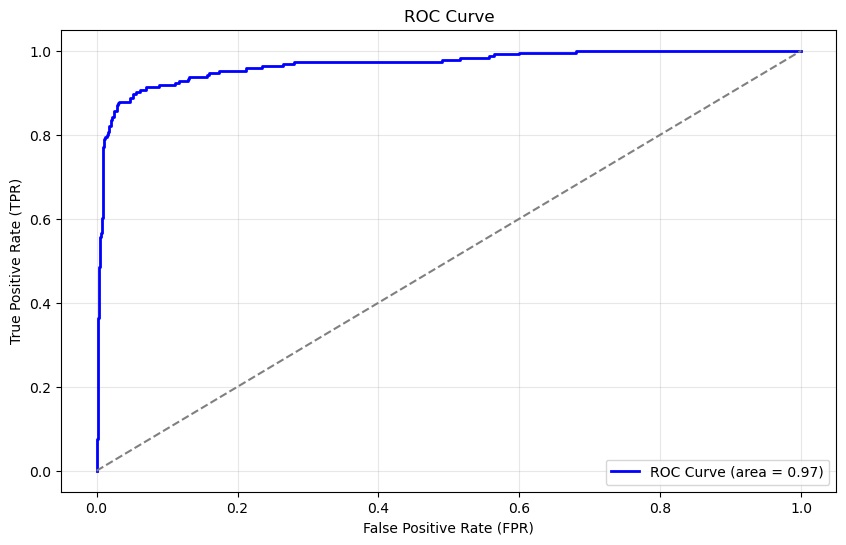

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming `y_test` and `y_test_pred` are defined
# Binarize the output (if multi-class)
if len(set(y_test)) > 2:  # Multi-class
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    y_score = model.predict_proba(X_test)
else:  # Binary class
    y_test_bin = y_test
    y_score = model.predict_proba(X_test)[:, 1]

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
if len(set(y_test)) > 2:  # Multi-class case
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")
else:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")

# Plotting details
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [63]:
##!pip install Xgboost